In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
df= data.data

In [5]:
df = pd.DataFrame(df,columns=data.feature_names)

In [6]:
y = pd.DataFrame(data=data.target,columns=['category'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=104)

In [8]:
clf = SVC(decision_function_shape='ovo',C=2,gamma='scale')

In [9]:
clf.fit(X_train,y_train)

/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, decision_function_shape='ovo')

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
report = classification_report(y_pred,y_test)

In [13]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [14]:
confusion_matrix(y_pred,y_test)

array([[16,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

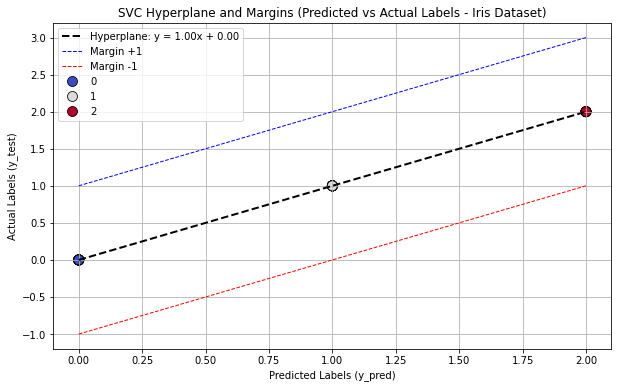

Hyperplane Equation: y = 1.00 * x + 0.00


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

def plot_svc_hyperplane_labels(y_test, y_pred, svc):
    plt.figure(figsize=(10, 6))

    # Encode labels (convert categorical to numerical if needed)
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(np.ravel(y_test))  # Ensure 1D array
    y_pred_encoded = label_encoder.transform(np.ravel(y_pred))      # Ensure 1D array

    # Fit a simple linear model to approximate the decision boundary
    reg = LinearRegression()
    reg.fit(y_pred_encoded.reshape(-1, 1), y_test_encoded)

    # Extract coefficients
    w0 = reg.coef_[0]  # Slope
    b = reg.intercept_  # Intercept

    # Generate hyperplane equation: y = w0 * x + b
    x_hyperplane = np.linspace(y_pred_encoded.min(), y_pred_encoded.max(), 200)
    y_hyperplane = w0 * x_hyperplane + b

    # Compute margin (approximate)
    margin = 1 / np.linalg.norm([w0])  
    y_margin1 = y_hyperplane + margin
    y_margin2 = y_hyperplane - margin

    # Plot hyperplane
    plt.plot(x_hyperplane, y_hyperplane, 'k--', linewidth=2, label=f"Hyperplane: y = {w0:.2f}x + {b:.2f}")

    # Plot margins
    plt.plot(x_hyperplane, y_margin1, 'b--', linewidth=1, label="Margin +1")
    plt.plot(x_hyperplane, y_margin2, 'r--', linewidth=1, label="Margin -1")

    # Scatter plot of actual vs predicted labels
    sns.scatterplot(x=y_pred_encoded, y=y_test_encoded, hue=label_encoder.inverse_transform(y_test_encoded), 
                    palette='coolwarm', edgecolor='k', s=100)

    plt.xlabel("Predicted Labels (y_pred)")
    plt.ylabel("Actual Labels (y_test)")
    plt.title("SVC Hyperplane and Margins (Predicted vs Actual Labels - Iris Dataset)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Hyperplane Equation: y = {w0:.2f} * x + {b:.2f}")

# Call the function
plot_svc_hyperplane_labels(y_test, y_pred, clf)
